In [21]:
import os
import zipfile

# Extract the archive
zip_ref = zipfile.ZipFile('../data/gaming.zip', 'r')
zip_ref.extractall('tmp/android_games')
zip_ref.close()



In [23]:
import tensorflow as tf

# Build the model - JUST RANDOM model 
model = tf.keras.models.Sequential([

    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(100, 100, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(9, activation='softmax')
])

In [24]:
from tensorflow.keras.optimizers import RMSprop

# Set training parameters
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(learning_rate=1e-4),
              metrics=['accuracy'])

In [25]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Apply data augmentation
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        'tmp/android_games/Game_Sub_Categorized_Android_Apps_Screenshots/train',  # This is the source directory for training images
        target_size=(224, 224),  
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')

# Flow training images in batches of 128 using train_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        'tmp/android_games/Game_Sub_Categorized_Android_Apps_Screenshots/validation',  # This is the source directory for training images
        target_size=(224, 224),  
        batch_size=64,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')

Found 9004 images belonging to 9 classes.
Found 1800 images belonging to 9 classes.


In [26]:
# Constant for epochs
EPOCHS = 50

# Train the model
history = model.fit(
      train_generator,
      steps_per_epoch=2,  
      epochs=EPOCHS,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=2)

Epoch 1/50
8/8 [==============================] - 1s 101ms/step - loss: 2.2014 - accuracy: 0.1562 - val_loss: 2.2004 - val_accuracy: 0.1016
Epoch 2/50
8/8 [==============================] - 1s 69ms/step - loss: 2.1913 - accuracy: 0.1406 - val_loss: 2.2024 - val_accuracy: 0.0781
Epoch 3/50
8/8 [==============================] - 1s 67ms/step - loss: 2.2042 - accuracy: 0.1406 - val_loss: 2.1997 - val_accuracy: 0.0781
Epoch 4/50
8/8 [==============================] - 1s 64ms/step - loss: 2.1876 - accuracy: 0.0938 - val_loss: 2.1990 - val_accuracy: 0.0859
Epoch 5/50
8/8 [==============================] - 1s 64ms/step - loss: 2.1975 - accuracy: 0.1094 - val_loss: 2.1889 - val_accuracy: 0.1562
Epoch 6/50
7/8 [=========================>....] - ETA: 0s - loss: 2.1927 - accuracy: 0.1429

2022-11-28 20:32:09.243449: W tensorflow/core/framework/op_kernel.cc:1733] UNKNOWN: UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x7f2c60ba3400>
Traceback (most recent call last):

  File "/home/poloniki/.pyenv/versions/lewagon/lib/python3.8/site-packages/tensorflow/python/ops/script_ops.py", line 275, in __call__
    ret = func(*args)

  File "/home/poloniki/.pyenv/versions/lewagon/lib/python3.8/site-packages/tensorflow/python/autograph/impl/api.py", line 649, in wrapper
    return func(*args, **kwargs)

  File "/home/poloniki/.pyenv/versions/lewagon/lib/python3.8/site-packages/tensorflow/python/data/ops/dataset_ops.py", line 992, in generator_py_func
    values = next(generator_state.get_iterator(iterator_id))

  File "/home/poloniki/.pyenv/versions/lewagon/lib/python3.8/site-packages/keras/engine/data_adapter.py", line 834, in wrapped_generator
    for data in generator_fn():

  File "/home/poloniki/.pyenv/versions/lewagon/lib/python3.8/site-packages/ker

8/8 [==============================] - 1s 65ms/step - loss: 2.1895 - accuracy: 0.1562 - val_loss: 2.2011 - val_accuracy: 0.1016
Epoch 7/50
8/8 [==============================] - 1s 71ms/step - loss: 2.1990 - accuracy: 0.0781 - val_loss: 2.1884 - val_accuracy: 0.1641
Epoch 8/50
8/8 [==============================] - 1s 65ms/step - loss: 2.1987 - accuracy: 0.1562 - val_loss: 2.2011 - val_accuracy: 0.0859
Epoch 9/50
8/8 [==============================] - 1s 67ms/step - loss: 2.1800 - accuracy: 0.1562 - val_loss: 2.2024 - val_accuracy: 0.1172
Epoch 10/50
8/8 [==============================] - 1s 66ms/step - loss: 2.1881 - accuracy: 0.0625 - val_loss: 2.2028 - val_accuracy: 0.1172
Epoch 11/50
8/8 [==============================] - 1s 66ms/step - loss: 2.1951 - accuracy: 0.1250 - val_loss: 2.1995 - val_accuracy: 0.1250
Epoch 12/50
8/8 [==============================] - 1s 66ms/step - loss: 2.1665 - accuracy: 0.1406 - val_loss: 2.1958 - val_accuracy: 0.1016
Epoch 13/50
8/8 [==================

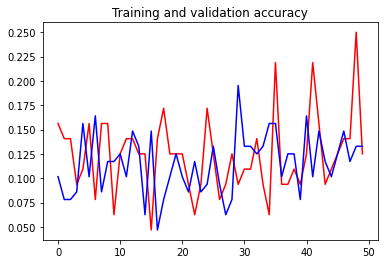

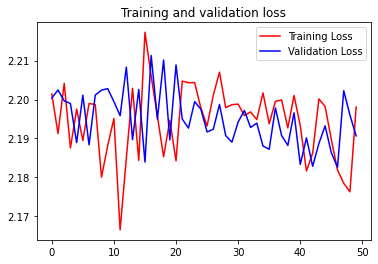

In [27]:
import matplotlib.pyplot as plt

# Plot the model results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()